### Bahasa Isyarat menggunakan Deep Learning
### Nama : Caezar Alfillail
### Kelas : SK5B Indralaya
### NIM : 09011281823044
### Source : https://www.kaggle.com/ranjeetjain3/deep-learning-using-sign-langugage

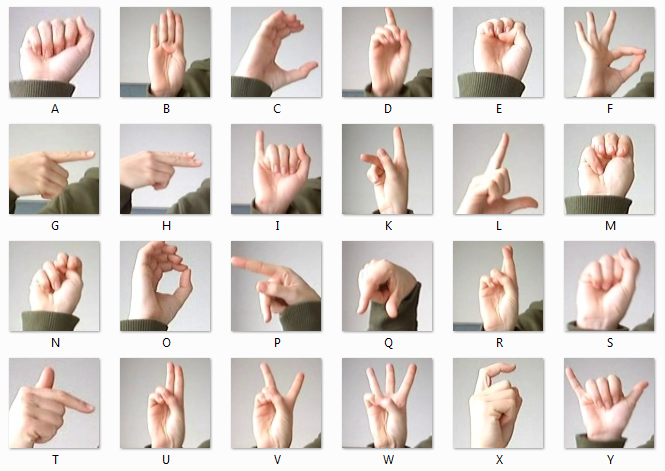

In [1]:
from IPython.display import Image
Image("../input/amer_sign2.png")

Load the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('../input/sign_mnist_train.csv')
test = pd.read_csv('../input/sign_mnist_test.csv')

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
train.shape

(27455, 785)

The data set is given in the form of labels and pixel value ranging from pixel 1 to pixel 784 which is 28 * 28 image.

Let's see what does each sign means

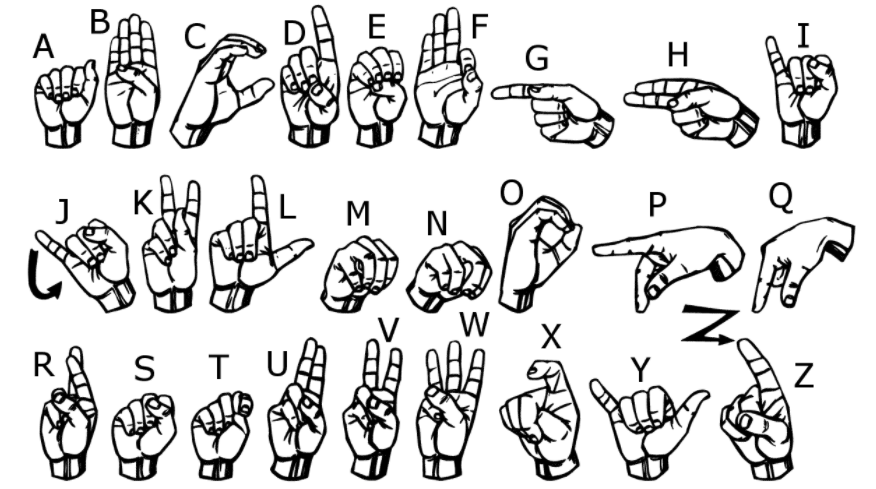

In [6]:
Image("../input/american_sign_language.PNG")

Each letter indicates a sign produced by our fingers. We will apply deep learning to these images to make sure our model can understand what sign indicated what letter

In [7]:
labels = train['label'].values

In [8]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

# Data exploration

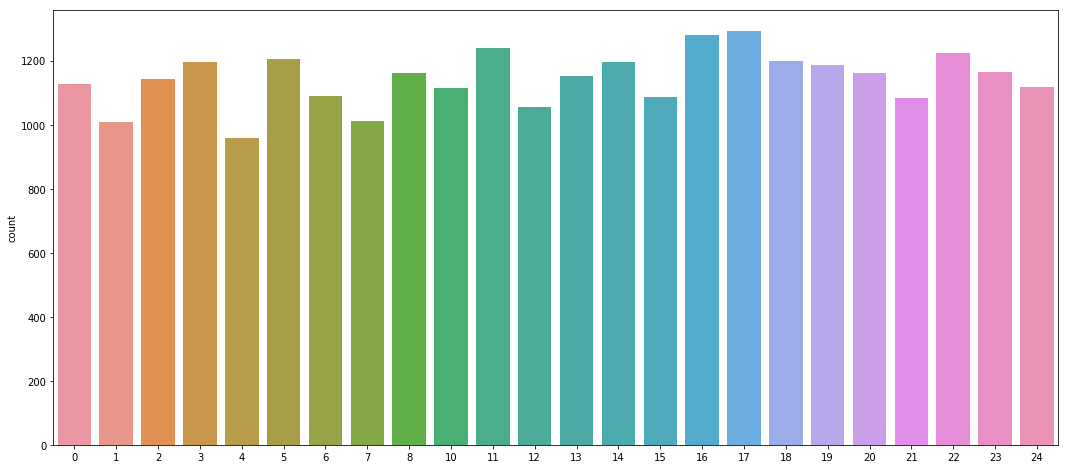

In [9]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

As you can see each one is almost equally distributed

In [10]:
train.drop('label', axis = 1, inplace = True)

We are droping the label coloumn from the training set

Re shaping the images

In [11]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

Since our target variable are in categorical(nomial) so we are using label binarizer

In [12]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [13]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

Lets see how the images look

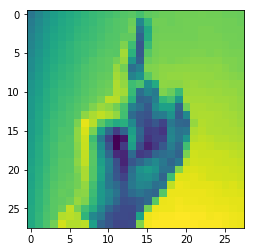

In [14]:
plt.imshow(images[0].reshape(28,28))

Spliting the dataset into train(70%) and test(30%)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

For deep learning i am using keras library

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Creating the batch size to 128 and using 50 epochs

In [18]:
batch_size = 128
num_classes = 24
epochs = 50

Normalizing the training and test data

In [19]:
x_train = x_train / 255
x_test = x_test / 255

In [20]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [21]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Visualizing the image after normalizing

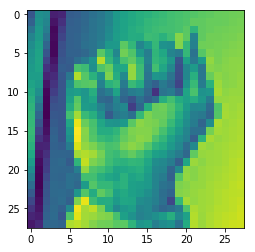

In [22]:
plt.imshow(x_train[0].reshape(28,28))

# CNN Model

In [23]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [24]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [25]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 14s 749us/step - loss: 2.5729 - acc: 0.2060 - val_loss: 1.6181 - val_acc: 0.5001
Epoch 2/50
19218/19218 [==============================] - 2s 80us/step - loss: 1.2922 - acc: 0.5680 - val_loss: 0.8648 - val_acc: 0.7232
Epoch 3/50
19218/19218 [==============================] - 2s 80us/step - loss: 0.7760 - acc: 0.7374 - val_loss: 0.5533 - val_acc: 0.8283
Epoch 4/50
19218/19218 [==============================] - 2s 79us/step - loss: 0.5154 - acc: 0.8281 - val_loss: 0.3299 - val_acc: 0.8998
Epoch 5/50
19218/19218 [==============================] - 2s 79us/step - loss: 0.3520 - acc: 0.8830 - val_loss: 0.2311 - val_acc: 0.9342
Epoch 6/50
19218/19218 [==============================] - 2s 121us/step - loss: 0.2447 - acc: 0.9212 - val_loss: 0.1451 - val_acc: 0.9638
Epoch 7/50
19218/19218 [==============================] - 2s 86us/step - loss: 0.1733 - acc: 0.9451 - val_loss: 0.0910 - val_a

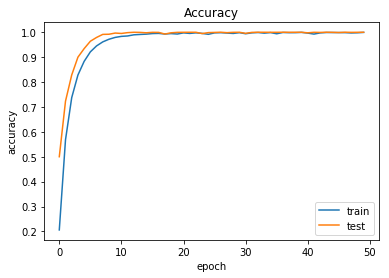

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

As you can see, the number of epochs increase the accuracy also increases.

Let's validate with the test data

In [27]:
test_labels = test['label']

In [28]:
test.drop('label', axis = 1, inplace = True)

In [29]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [30]:
test_labels = label_binrizer.fit_transform(test_labels)

In [31]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [32]:
test_images.shape

(7172, 28, 28, 1)

Predecting with test images

In [33]:
y_pred = model.predict(test_images)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(test_labels, y_pred.round())

0.8386781929726715

As we can see we got a really great accuracy 

We can increate the accuracy by tuning the hyper parameters of the model like playing with different activation functions and using different loss functions